In [13]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [14]:
# creating path to data
train_path = 'Tomatoes/train'
valid_path = 'Tomatoes/val'

In [15]:
IMAGE_RES = 224
BATCH_SIZE = 10

In [16]:
#formatting the data (putting the images into keras data generator)
train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=(IMAGE_RES, IMAGE_RES), classes=['tomatoes_healthy', 'tomatoes_Bacterial_spot'], batch_size=BATCH_SIZE)

valid_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=valid_path, target_size=(IMAGE_RES, IMAGE_RES), classes=['tomatoes_healthy', 'tomatoes_Bacterial_spot'], batch_size=BATCH_SIZE, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [17]:
# making assertions
assert train_batches.n == 2000
assert valid_batches.n == 199
assert train_batches.num_classes == valid_batches.num_classes

In [18]:
imgs, labels = next(train_batches)

In [19]:
# function for plotting processed images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

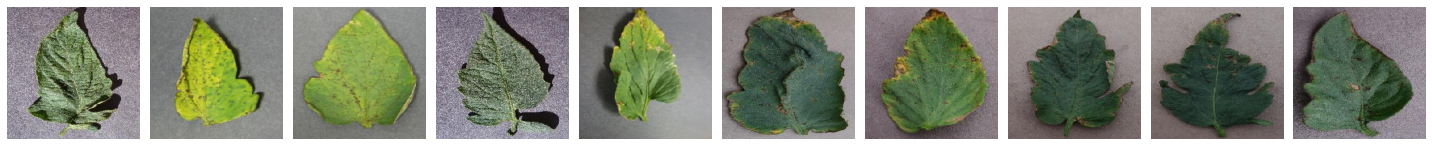

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
plotImages(imgs)
print(labels)

In [21]:
# modeling
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(IMAGE_RES, IMAGE_RES,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# model training
model.fit(x=train_batches,
    steps_per_epoch = len(train_batches),
    validation_data = valid_batches,
    validation_steps = len(valid_batches),
    epochs = 5, verbose = 2
)

Epoch 1/5
200/200 - 196s - loss: 0.2244 - accuracy: 0.9135 - val_loss: 0.0263 - val_accuracy: 0.9950 - 196s/epoch - 981ms/step
Epoch 2/5
200/200 - 202s - loss: 0.0368 - accuracy: 0.9915 - val_loss: 0.0243 - val_accuracy: 0.9950 - 202s/epoch - 1s/step
Epoch 3/5
200/200 - 203s - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0070 - val_accuracy: 1.0000 - 203s/epoch - 1s/step
Epoch 4/5
200/200 - 197s - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.0111 - val_accuracy: 0.9950 - 197s/epoch - 985ms/step
Epoch 5/5
200/200 - 206s - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.0052 - val_accuracy: 1.0000 - 206s/epoch - 1s/step


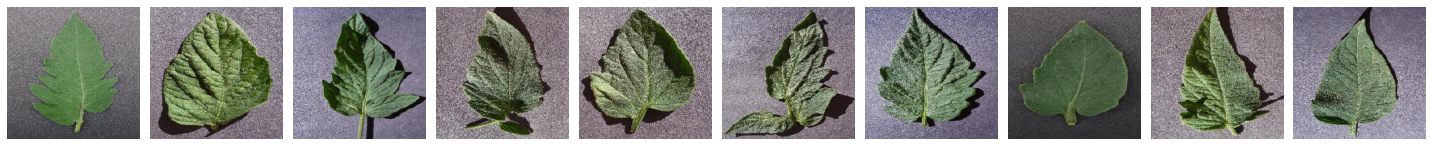

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
# ploting test data
valid_imgs, valid_labels = next(valid_batches)
plotImages(valid_imgs)
print(valid_labels)

The above images here are the healthy tomato leafs

In [26]:
# the unshuffle labels
valid_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [27]:
# model prediction
predictions = model.predict(x=valid_batches, steps=len(valid_batches), verbose=0)

In [28]:
np.round(predictions[0:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
cm = confusion_matrix(y_true=valid_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
valid_batches.class_indices

{'tomatoes_healthy': 0, 'tomatoes_Bacterial_spot': 1}

Confusion matrix, without normalization
[[ 99   0]
 [  0 100]]


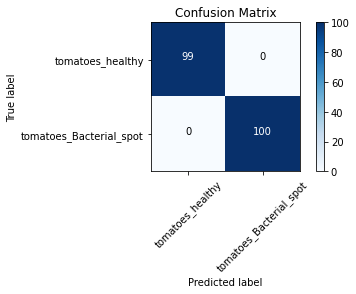

In [32]:
cm_plot_labels = ['tomatoes_healthy','tomatoes_Bacterial_spot']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [33]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)